In [1]:
import torch, torchvision

device = torch.device("cpu")

In [3]:
from torchvision.models import efficientnet_v2_l, EfficientNet_V2_L_Weights

weights = EfficientNet_V2_L_Weights.DEFAULT
model = efficientnet_v2_l(weights=weights)
model.eval().to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

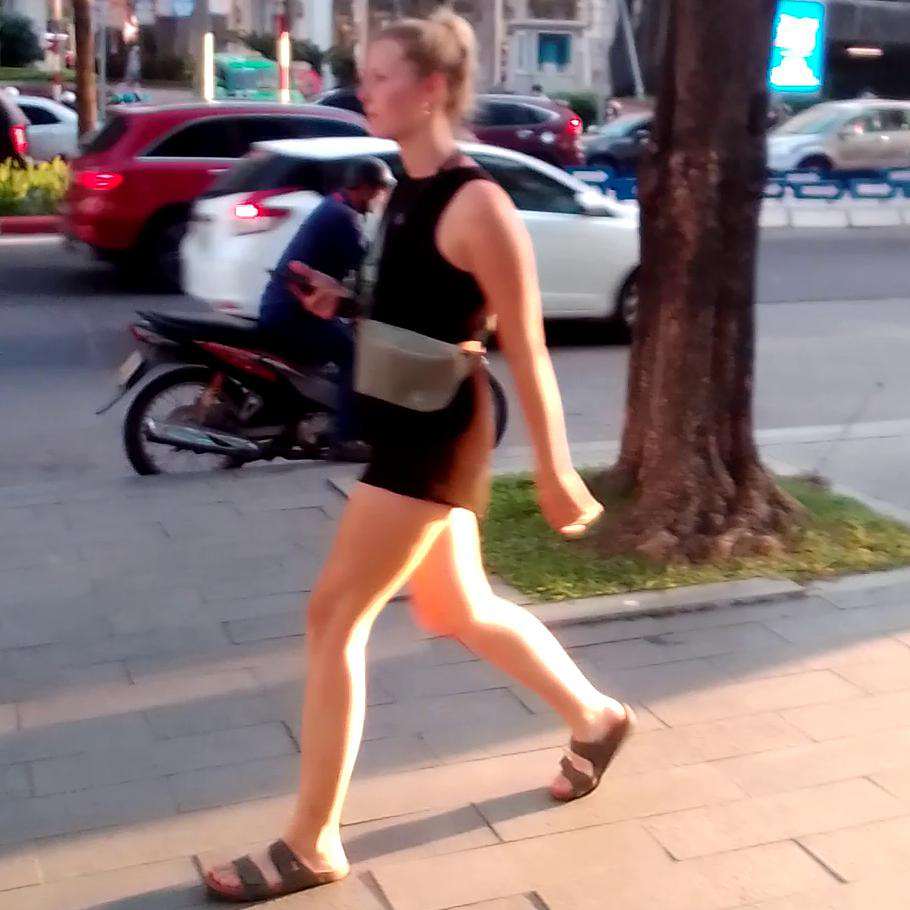

In [4]:
from PIL import Image
image = Image.open("Targets/0.jpg")
image

In [6]:
transforms = weights.transforms()
input_image = transforms(image).unsqueeze(0)
input_image

tensor([[[[-0.5137, -0.3647, -0.2941,  ..., -0.4431, -0.4667, -0.4902],
          [-0.5137, -0.3569, -0.2627,  ..., -0.2157, -0.2314, -0.2549],
          [-0.5373, -0.3804, -0.2471,  ..., -0.0980, -0.0902, -0.0745],
          ...,
          [ 0.5608,  0.5608,  0.5608,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.5529,  0.5529,  0.5529,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.5451,  0.5451,  0.5451,  ...,  1.0000,  1.0000,  1.0000]],

         [[-0.4510, -0.3098, -0.2392,  ..., -0.4275, -0.4510, -0.4745],
          [-0.4510, -0.3020, -0.2078,  ..., -0.2000, -0.2157, -0.2392],
          [-0.4667, -0.3098, -0.1843,  ..., -0.0824, -0.0745, -0.0588],
          ...,
          [ 0.3255,  0.3255,  0.3255,  ...,  0.7176,  0.7176,  0.7176],
          [ 0.3176,  0.3176,  0.3176,  ...,  0.7255,  0.7255,  0.7255],
          [ 0.3098,  0.3098,  0.3098,  ...,  0.7333,  0.7333,  0.7333]],

         [[-0.4275, -0.2627, -0.1529,  ..., -0.3098, -0.3333, -0.3569],
          [-0.4275, -0.2549, -

In [7]:
prediction = model(input_image).squeeze(0).softmax(0)
prediction

tensor([6.1909e-05, 4.6551e-05, 1.7984e-05, 4.4214e-05, 6.4048e-05, 1.0785e-04,
        2.6543e-05, 6.0635e-05, 1.6810e-05, 5.3317e-05, 5.1100e-05, 6.8946e-05,
        8.0908e-05, 6.1656e-05, 9.1689e-05, 4.6414e-05, 1.8668e-05, 3.1998e-05,
        2.1027e-04, 5.4406e-05, 1.6646e-04, 2.4633e-04, 3.1664e-05, 4.4680e-05,
        4.9536e-05, 3.9563e-05, 3.5616e-05, 2.0795e-05, 5.1176e-05, 8.5152e-05,
        5.8157e-05, 5.4102e-05, 1.6358e-04, 4.0440e-05, 3.4281e-05, 3.6249e-05,
        3.3456e-05, 3.6556e-05, 2.4776e-05, 5.6548e-05, 7.6010e-05, 6.6236e-05,
        4.4809e-05, 7.4498e-05, 4.8264e-05, 4.0145e-05, 3.4736e-05, 3.3720e-05,
        5.0604e-05, 5.3762e-05, 3.0349e-05, 2.6319e-05, 1.4636e-04, 7.4975e-05,
        2.7113e-05, 3.1704e-05, 4.0929e-05, 2.3133e-05, 6.5192e-05, 8.0802e-05,
        2.0109e-04, 5.5922e-05, 4.7213e-05, 5.9589e-05, 1.0524e-04, 4.2500e-05,
        3.6036e-05, 3.2947e-05, 1.3945e-04, 5.7001e-05, 4.9683e-05, 7.6143e-05,
        2.3714e-05, 1.1170e-04, 7.0055e-

In [9]:
class_id = prediction.argmax().item()
category = weights.meta["categories"][class_id]
score = prediction[class_id].item()

print(f"Found {category} with score {score*100}")

Found miniskirt with score 73.98593425750732


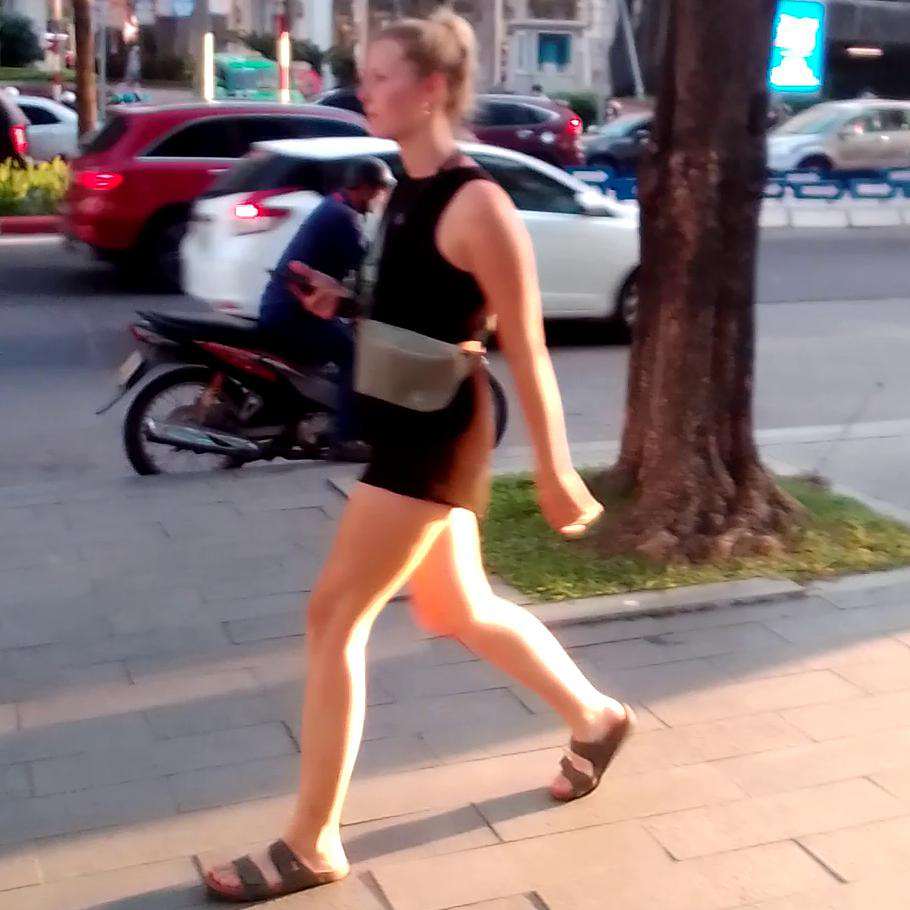

In [10]:
image